Development for The Dataland election predictions

Figure test.png saved in reports directory.


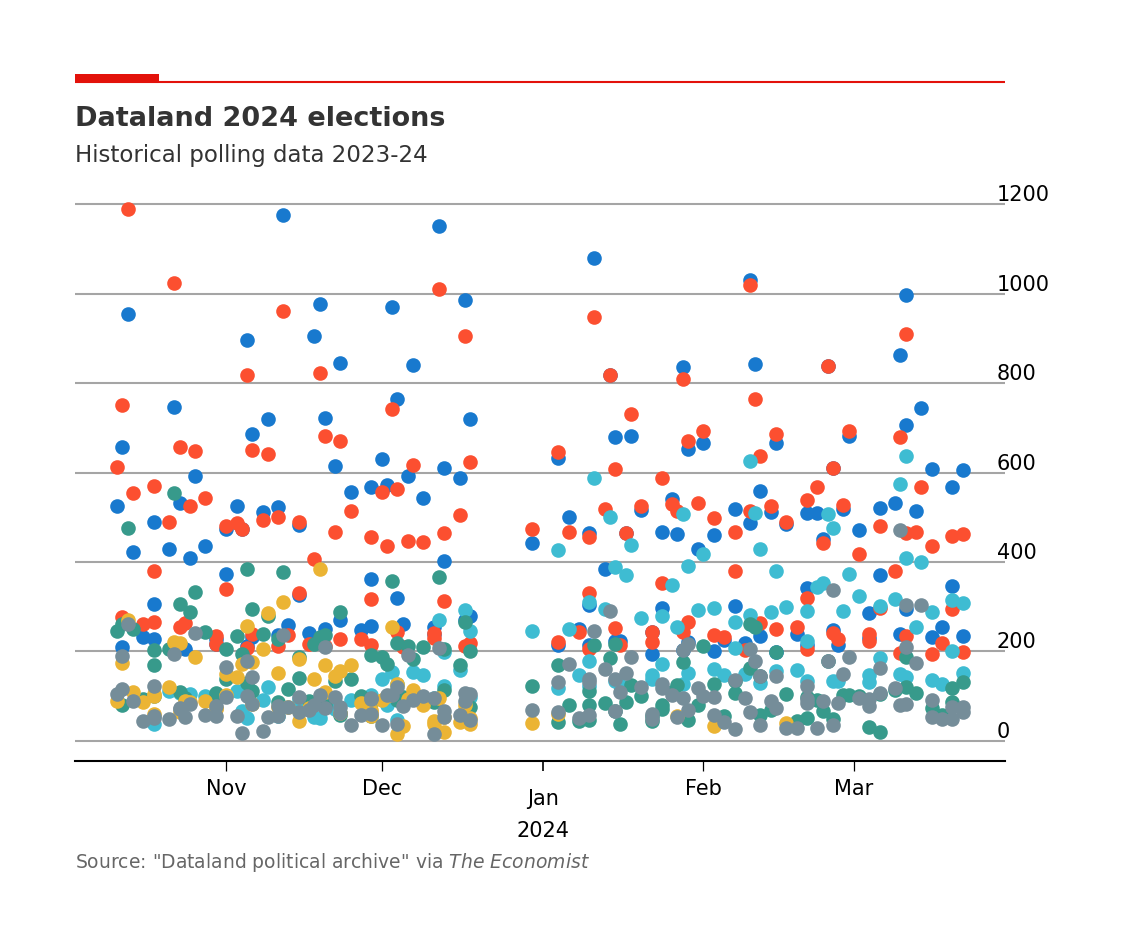

In [10]:
import sys
sys.path.append('..')

from src import DataEngineering, PlotTimeSeries
from matplotlib import pyplot as plt
import numpy as np

df = DataEngineering().load_from_file()
plt_ts = PlotTimeSeries()
fig, ax = plt_ts.get_panels()

for i in ['Bulstrode', 'Lydgate', 'Vincy', 'Casaubon', 'Chettam', 'Others']:

    ax.scatter(df['Date'], df[i] * df['Sample'])
    


plt_ts.set_title('Dataland 2024 elections', subtitle='Historical polling data 2023-24')
plt_ts.set_source('Dataland political archive', pad=0.15)

# fig.set_facecolor('lightgrey')
plt_ts.savefig('test.png', dpi=250)

In [11]:
from src import DataScience

df = DataEngineering().load_from_file()
ds = DataScience(df)
df_p = ds.load_pollster_from_file('DemocracyMeter')
df_p

,Date,Pollster,Sample,Bulstrode,Lydgate,Vincy,Casaubon,Chettam,Others,Excludes overseas territories
0,2023-10-16,DemocracyMeter,724.000000,0.320000,0.360000,NaN,0.130000,0.120000,0.060000,False
1,2023-10-17,DemocracyMeter,724.000000,0.317143,0.358571,NaN,0.132857,0.115714,0.065714,False
2,2023-10-18,DemocracyMeter,724.000000,0.314286,0.357143,NaN,0.135714,0.111429,0.071429,False
3,2023-10-19,DemocracyMeter,724.000000,0.311429,0.355714,NaN,0.138571,0.107143,0.077143,False
4,2023-10-20,DemocracyMeter,724.000000,0.308571,0.354286,NaN,0.141429,0.102857,0.082857,False
...,...,...,...,...,...,...,...,...,...,...
150,2024-03-14,DemocracyMeter,735.428571,0.377143,0.310000,0.185714,0.068571,0.050000,0.092857,False
151,2024-03-15,DemocracyMeter,728.571429,0.372857,0.310000,0.184286,0.071429,0.050000,0.087143,False
152,2024-03-16,DemocracyMeter,721.714286,0.368571,0.310000,0.182857,0.074286,0.050000,0.081429,False
153,2024-03-17,DemocracyMeter,714.857143,0.364286,0.310000,0.181429,0.077143,0.050000,0.075714,False


In [3]:
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from sklearn.linear_model import LinearRegression

In [21]:
dff = df_p.loc[:, ['Pollster', 'Date', 'Bulstrode']]
dff.rename({'Pollster': 'unique_id', 'Date': 'ds', 'Bulstrode': 'y'}, axis=1, inplace=True)
dff['unique_id'].value_counts()
dff

,unique_id,ds,y
0,DemocracyMeter,2023-10-16,0.320000
1,DemocracyMeter,2023-10-17,0.317143
2,DemocracyMeter,2023-10-18,0.314286
3,DemocracyMeter,2023-10-19,0.311429
4,DemocracyMeter,2023-10-20,0.308571
...,...,...,...
150,DemocracyMeter,2024-03-14,0.377143
151,DemocracyMeter,2024-03-15,0.372857
152,DemocracyMeter,2024-03-16,0.368571
153,DemocracyMeter,2024-03-17,0.364286


In [22]:
fcst = MLForecast(
    models=LinearRegression(),
    freq='d',  # our serie has a monthly frequency
    lags=[365],
)
fcst.fit(dff)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [23]:
from django.core.validators import URLValidator


ModuleNotFoundError: No module named 'django'